In [1]:
%matplotlib inline

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc

import os
import random
import pickle

In [2]:
imageFolder = "images"

image_dim = 1

fac = 4 ### PARAMETER 1 - REDUCES THE RESOLUTION OF THE AERIAL IMAGE

imgs = {}

for fileName in ["aerial_2005.jpg", "y_2005.jpg", "y_2010.jpg"]:
    img = misc.imread("/".join([imageFolder, fileName]))

    if image_dim == 1 and len(img.shape) > 2: 
        img = img[:,:,0]
    
    img = misc.imresize(img, (img.shape[0]/fac, img.shape[1]/fac), interp='nearest')
    img = img / 255.0    
    imgs[fileName] = img

print "Load data complete"

Load data complete


image dimensions: (439, 756)


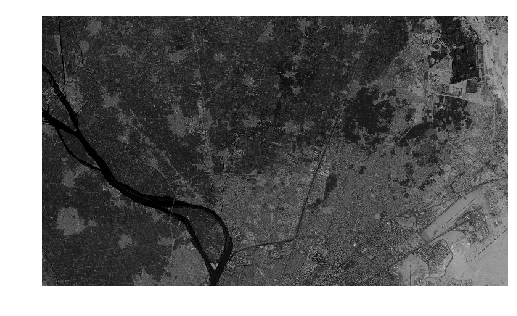

In [3]:
img = imgs["aerial_2005.jpg"]
print "image dimensions:", img.shape

imshow(img, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')
plt.axis('off')
plt.show()

In [4]:
import math

targetRes = 32  ### PARAMETER 2 - CONTROLS THE SIZE OF THE TRAINING IMAGES
stride = 2      ### PARAMETER 3 - CONTROLS THE NUMBER OF SAMPLES PRODUCED

img = imgs["aerial_2005.jpg"]
xStep = int( math.floor( ( float(img.shape[0]) - targetRes ) / stride) )
yStep = int( math.floor( ( float(img.shape[1]) - targetRes ) / stride) )

print xStep, yStep

data = []

for y in range(yStep):
    for x in range(xStep):
        
        sample = []
        
        crop = imgs["aerial_2005.jpg"][x * stride : (x * stride) + targetRes, y * stride : (y * stride) + targetRes]
        sample.append(crop)
        
        # This code calculates the change in urbanization based on two ground truth images
        
        p = []

        for layer in ["y_2005.jpg", "y_2010.jpg"]:
            target = imgs[layer][x * stride : (x * stride) + targetRes, y * stride : (y * stride) + targetRes]
            target_val = int ( round( np.mean(target) ) )
            p.append(target_val)
        
        if p[0] == 0: # not urbanized in y0
            if p[1] == 0: # not urbanized in y1
                sample.append(0)
            else: # urbanized in y1
                sample.append(1)
        else: # urbanized in y0
            if p[1] == 0: # not urbanized in y1
                sample.append(2)
            else: # urbanized in y1
                sample.append(3)
            
        data.append(sample)

# don't forget to shuffle!
random.shuffle(data)
        
print "num samples:", len(data)

203 362
num samples: 73486


image dimensions: (32, 32)
Value: 3


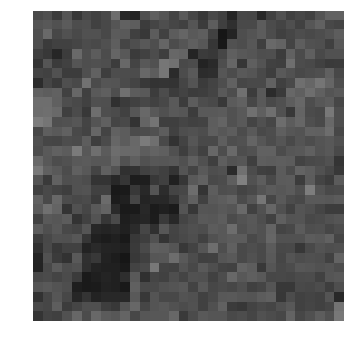

In [5]:
# preview one sample to make sure everything worked as expected

img_index = 1000

img = data[img_index][0]
print "image dimensions:", img.shape
print "Value:", (data[img_index][1])

imshow(img, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')
plt.axis('off')
plt.show()

In [6]:
# build X and y datasets for training

X = np.ndarray((len(data), targetRes, targetRes), dtype=np.float32)
y = np.ndarray((len(data), 1), dtype=np.int32)

for i, d in enumerate(data):
    X[i] = d[0]
    y[i] = d[1]

In [7]:
# export data to external file

pickle_file = '-data.pickle'

try:
    f = open(pickle_file, 'wb')
    save = {
        'X': X,
        'y': y,
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print 'Unable to save data to', pickle_file, ':', e
    raise
    
statinfo = os.stat(pickle_file)
print 'Saved data to', pickle_file
print 'Compressed pickle size:', statinfo.st_size

Saved data to -data.pickle
Compressed pickle size: 301292861


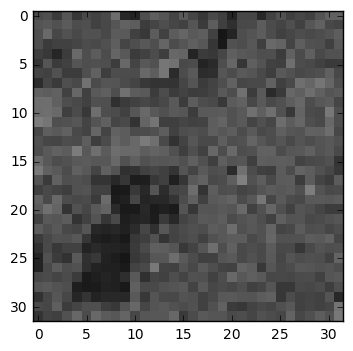

In [8]:
# preview one sample from the final X dataset to make sure nothing happened along the way

%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

img_num = 1000
img = X[img_num]
imshow(img, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')